<a href="https://colab.research.google.com/github/nguyennhatdangkhoa20130295/ML_Thu3_Ca4/blob/main/Project_Midterm_Machine_Learning_Nh%C3%B3m_35.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chủ đề: Heart Failure Prediction

# Thành viên thực hiện:
*   Nguyễn Nhất Đăng Khoa - 20130295
*   Hoàng Trung Hiếu - 20130260




# 1. Giới thiệu
1.   Mô tả vấn đề:


*   Bệnh tim mạch (CVD) là nguyên nhân gây tử vong số 1 trên toàn cầu, ước tính cướp đi sinh mạng của 17,9 triệu người mỗi năm, chiếm 31% tổng số ca tử vong trên toàn thế giới. Bốn trong số các trường hợp tử vong do 5CVD là do đau tim và đột quỵ, và một phần ba số ca tử vong này xảy ra sớm ở những người dưới 70 tuổi. Suy tim là một biến cố phổ biến do CVD gây ra và bộ dữ liệu này chứa 11 đặc điểm có thể được sử dụng để dự đoán bệnh tim có thể xảy ra.
*   Những người mắc bệnh tim mạch hoặc những người có nguy cơ mắc bệnh tim mạch cao (do có một hoặc nhiều yếu tố nguy cơ như tăng huyết áp, tiểu đường, tăng mỡ máu hoặc bệnh đã hình thành) cần được phát hiện và quản lý sớm trong đó mô hình máy học có thể giúp ích rất nhiều.


2.   Mục tiêu:
*   Để phân loại/dự đoán bệnh nhân có dễ bị suy tim hay không phụ thuộc vào nhiều thuộc tính.
*   Thực hiện các thuật toán phân lớp nhị phân (binary classification) với nhiều đặc trưng số (numerical feature) và đặc trưng phân loại (categorical feature).

In [ ]:
# code
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML'

Mounted at /content/gdrive
/content/gdrive/MyDrive/ML


In [ ]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import thư viện
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.metrics import accuracy_score 
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from prettytable import PrettyTable
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, CategoricalNB, BernoulliNB, MultinomialNB, ComplementNB
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, Normalizer
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from tensorflow import keras
from sklearn.model_selection import GridSearchCV

# 2. Thông tin dữ liệu
### 2.1 Thông tin thuộc tính

Dữ liệu dự đoán suy tim (Heart Failure Prediction) có các thuộc tính như sau:
1.   **Age**: Tuổi của bệnh nhân (đơn vị: năm).
2.   **Sex**: Giới tính của bệnh nhân (M: Nam, F: Nữ).
3.   **ChestPainType**: Loại đau ngực (TA: Đau ngực điển hình, ATA: Đau ngực không điển hình, NAP: Đau không phải nguyên nhân, ASY: Không triệu chứng).
4.   **RestingBP**: Huyết áp nghỉ (đơn vị: mm Hg).
5.   **Cholesterol**: Cholesterol huyết thanh (đơn vị: mm/dl).
6.   **FastingBS**: Máu đói (1: nếu FastingBS > 120 mg/dl, 0: ngược lại).
7.   **RestingECG**: Kết quả điện tâm đồ khi nghỉ (Normal: Bình thường, ST: Có biểu hiện sóng ST-T bất thường (đảo ngược sóng T và/hoặc tăng hoặc giảm ST > 0.05 mV), LVH: Hiển thị phì đại thất trái có thể hoặc xác định dựa trên tiêu chí Estes').
8.   **MaxHR**: Nhịp tim tối đa đạt được (giá trị số từ 60 đến 202).
9.   **ExerciseAngina**: Đau ngực do tập thể dục (Y: Có, N: Không).
10.   **Oldpeak**: Độ suy giảm của ST (giá trị số được đo bằng độ giảm).
11.   **ST_Slope**: Độ dốc của đoạn ST đỉnh tập thể dục (Up: Lên, Flat: Bằng phẳng, Down: Xuống).
12.   **HeartDisease**: Lớp kết quả (1: Bệnh tim, 0: Bình thường).


# 3. Phân tích Khám phá Dữ liệu (EDA)

In [ ]:
# Đọc dữ liệu
heart_df = pd.read_csv("heart.csv")

## 3.1 Tổng quan về dữ liệu

In [ ]:
display(heart_df.head())
display(heart_df.shape)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


(918, 12)

*   Số lượng mẫu: Có 918 mẫu trong tập dữ liệu.
*   Số lượng thuộc tính: Có tổng cộng 12 thuộc tính trong tập dữ liệu.


In [ ]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB



*   Có 7 thuộc tính thuộc kiểu số và 5 thuộc tính thuộc kiểu đối tượng.
*   Không có missing dữ liệu trong bộ dữ liệu này.

In [ ]:
# Bảng tóm tắt thống kê mô tả
def highlight_min(s, props=''):
    return np.where(s == np.nanmin(s.values), props, '')
heart_df.describe().style.apply(highlight_min, props='color:Black;background-color:#da627d', axis=0)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## 3.2 Kiểm tra biến mục tiêu

In [ ]:
# Tính toán số lượng mẫu bị và không bị bệnh tim
heart_disease_counts = heart_df['HeartDisease'].value_counts()
print(heart_disease_counts)
# Vẽ biểu đồ tròn
labels=["Heart Disease", "No Heart Disease"]
heart_disease_or_not = heart_df['HeartDisease'].value_counts().tolist()
values = [heart_disease_or_not[1], heart_disease_or_not[0]]

fig = px.pie(values=heart_df['HeartDisease'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["#a53860","#da627d"]
             ,title="Heart Disease vs No Heart Disease")
fig.show()

1    508
0    410
Name: HeartDisease, dtype: int64


Tỷ lệ mắc bệnh tim : 53,3% (508 trường hợp).\
Tỷ lệ không mắc bệnh tim : 44,7% (410 trường hợp).

## 3.3 Trực quan hóa dữ liệu

In [ ]:
# Chia các đặc trưng thành 2 loại Numerical và Categorical
col = list(heart_df.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(heart_df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',categorical_features)
print('Numerical Features :',numerical_features)

Categorical Features : ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']
Numerical Features : ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']




---



#### Đặc trưng phân loại (Categorical Features):





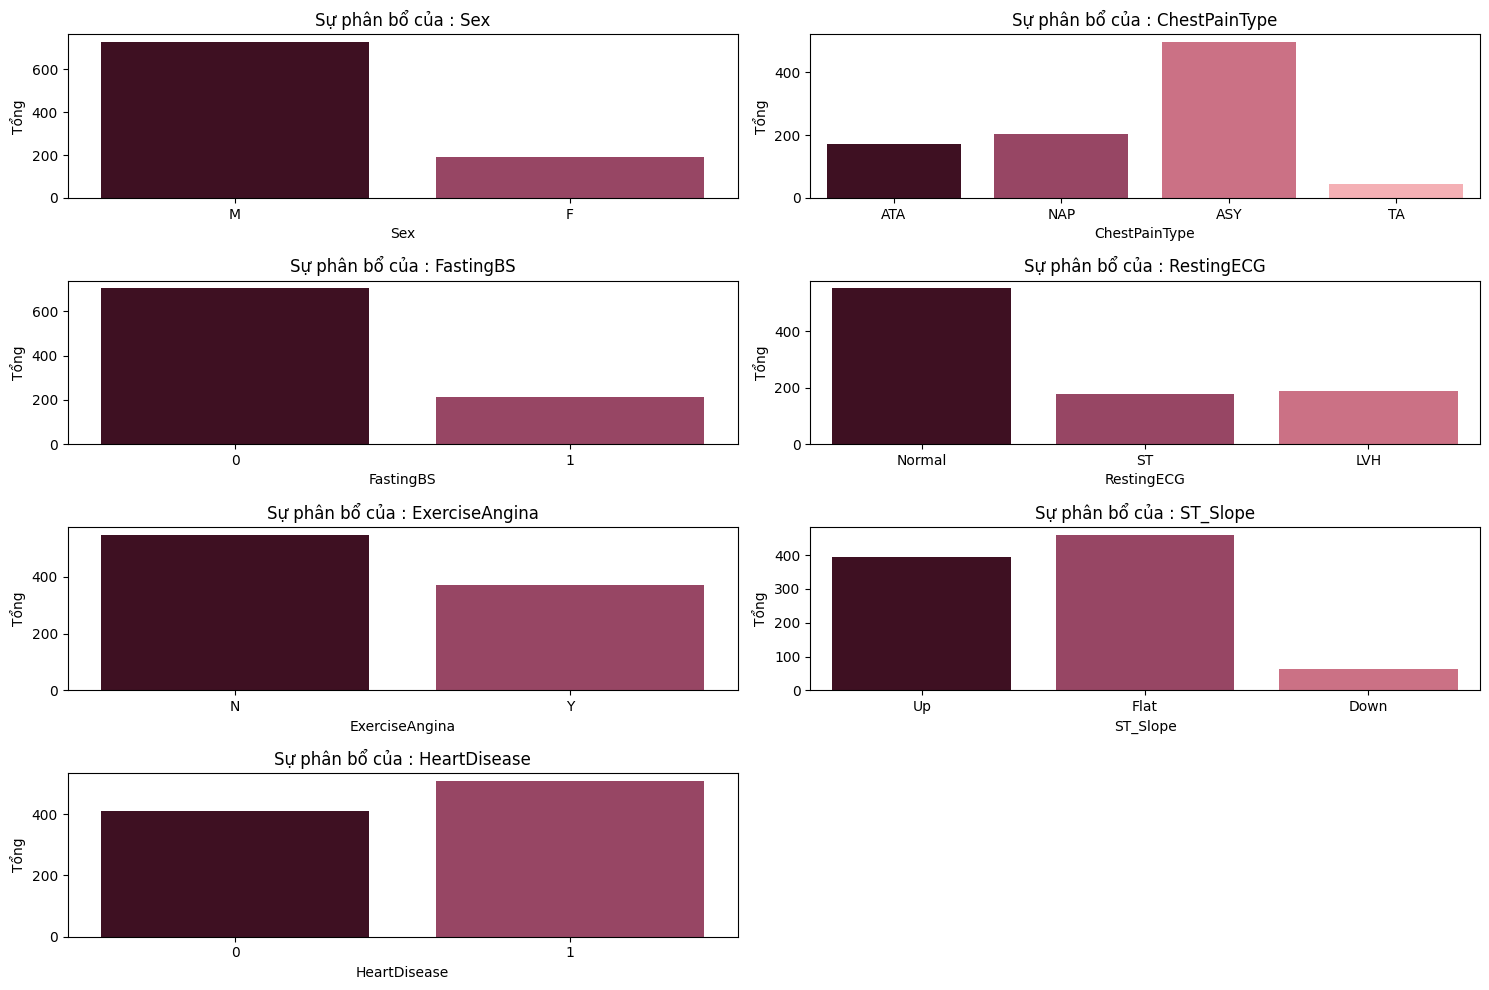

In [ ]:
# Vẽ biểu đồ cột cho các đặc trưng phân loại (Categorical Features):
num_rows = math.ceil(len(categorical_features)/2)
num_cols = 2

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))

custom_palette = ['#450920', '#a53860', '#da627d', '#ffa5ab', '#f9dbbd']

# Làm phẳng mảng axs
axs = axs.flatten()

for i, feature in enumerate(categorical_features):
    if i < len(categorical_features):
        ax = axs[i]
        sns.countplot(x=feature, data=heart_df, ax=ax, palette=custom_palette, hue=None)
        title = 'Sự phân bổ của : ' + feature
        ax.set_title(title)
        ax.set_xlabel(feature)
        ax.set_ylabel('Tổng')

# Ẩn các ô trống không sử dụng
for j in range(i+1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

#### Đặc trưng số (Numerical Features):

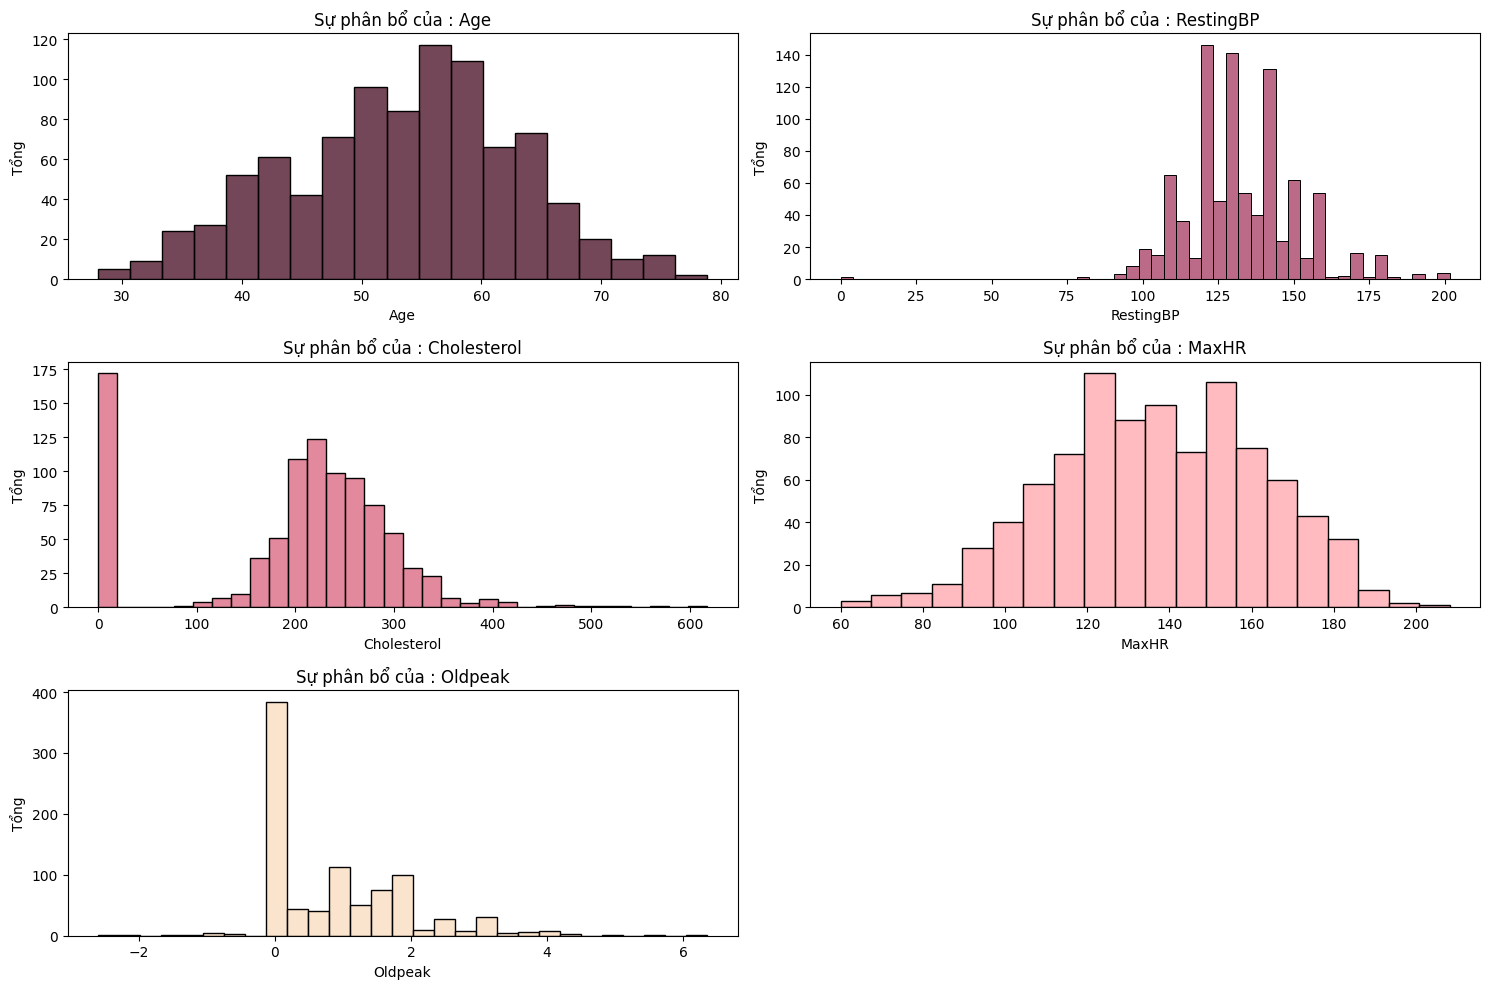

In [ ]:
# Vẽ biểu đồ cột cho các đặc trưng phân số (Numerical Features)

def calculate_binwidth(data):
    # Sử dụng phương pháp Freedman-Diaconis rule
    iqr = np.percentile(data, 75) - np.percentile(data, 25)
    binwidth = (2 * iqr) / (len(data) ** (1/3))
    return binwidth

num_rows = math.ceil(len(numerical_features)/2)
num_cols = 2

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))

custom_palette = ['#450920', '#a53860', '#da627d', '#ffa5ab', '#f9dbbd']

# Làm phẳng mảng axs
axs = axs.flatten()

for i, feature in enumerate(numerical_features):
    ax = axs[i]
    # Tính binwidth phù hợp cho thuộc tính
    binwidth = calculate_binwidth(heart_df[feature])
    sns.histplot(x=feature, data=heart_df, ax=ax, binwidth=binwidth, color=custom_palette[i])
    title = 'Sự phân bổ của : ' + feature
    ax.set_title(title)
    ax.set_xlabel(feature)
    ax.set_ylabel('Tổng')

# Ẩn các ô trống không sử dụng
for j in range(i+1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

#### Các đặc trưng phân loại và Biến mục tiêu (HeartDisease):

In [ ]:
custom_palette = ['#450920', '#a53860', '#da627d', '#ffa5ab', '#f9dbbd']
for feature in categorical_features[:-1]:
    fig = px.histogram(heart_df, 
                       x=feature,
                       color="HeartDisease",
                       hover_data=heart_df.columns,
                       title=f"HeartDisease vs {feature}",
                       barmode="group",
                       color_discrete_sequence=custom_palette)
    fig.update_layout(width=800, height=500)
    fig.show()

#### Các đặc trưng số và Biến mục tiêu (HeartDisease):

In [ ]:
for feature in numerical_features:
    fig = px.histogram(heart_df, 
                       x=feature,
                       color="HeartDisease",
                       hover_data=heart_df.columns,
                       title=f"HeartDisease vs {feature}",
                       barmode="group",
                       color_discrete_sequence=custom_palette)
    fig.update_layout(width=800, height=500)
    fig.show()

# 4. Tiền xử lý dữ liệu
## 4.1. Sơ chế dữ liệu


*   Kiểm tra và xử lý dữ liệu bị thiếu. 
*   Kiểm tra và xử lý các dòng dữ liệu bị trùng lặp.
*   Mã hóa nhãn biến định tính (Label Encoding) cho các đặc trưng phân loại.
*   Chuẩn hóa giá trị của các đặc trưng (Feature Scaling).


In [ ]:
# Kiểm tra có bị trùng lặp dữ liệu không?
print('Số dữ liệu trùng lặp:', len(heart_df[heart_df.duplicated()]))

# Kiểm tra có bị missing dữ liệu không?
print('Số dữ liệu bị missing:', heart_df.isnull().sum().sum())

print('=> Không có dữ liệu bị trùng lặp và missing.')
# Chuyển đổi các đặc trưng phân loại thành dữ liệu số
le = LabelEncoder() 
heart_df[categorical_features] = heart_df[categorical_features].apply(lambda col: le.fit_transform(col)) 

# Chuẩn hóa giá trị của các đặc trưng số
X_numerical = heart_df.loc[:, numerical_features]
scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X_numerical)

Số dữ liệu trùng lặp: 0
Số dữ liệu bị missing: 0
=> Không có dữ liệu bị trùng lặp và missing.


## 4.2. Trích chọn đặc trưng

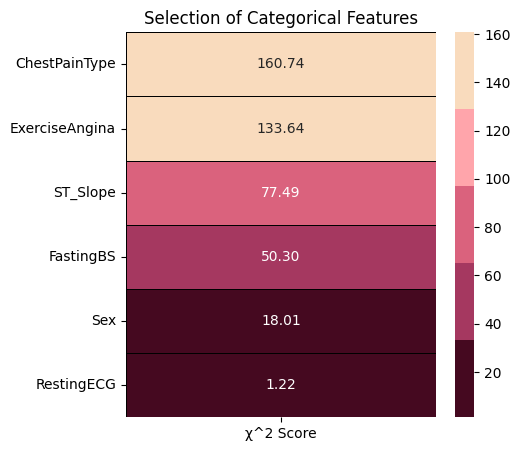

In [ ]:
# Áp dụng SelectKBest cho các đặc trưng phân loại
X_categorical = heart_df.loc[:,categorical_features[:-1]]
y = heart_df['HeartDisease']

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(X_categorical,y)

featureScores = pd.DataFrame(data = fit.scores_,index = list(X_categorical.columns),columns = ['χ^2 Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'χ^2 Score'),annot = True, cmap = custom_palette,linewidths = 0.4,linecolor = 'black', fmt = '.2f');
plt.title('Selection of Categorical Features');

Text(0.5, 1.0, 'Selection of Numerical Features')

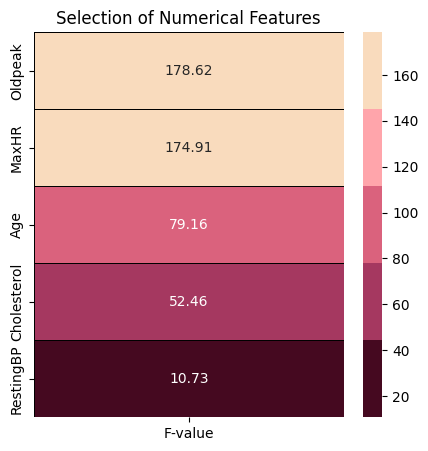

In [ ]:
# Áp dụng SelectKBest cho các đặc trưng số
X_numerical_scaled = pd.DataFrame(X_numerical_scaled, columns=numerical_features)

best_features = SelectKBest(score_func=f_classif, k='all')
fit = best_features.fit(X_numerical_scaled, y)

featureScores = pd.DataFrame(data=fit.scores_, index=list(X_numerical_scaled.columns), columns=['F-value'])

plt.subplots(figsize=(5, 5))
sns.heatmap(featureScores.sort_values(by='F-value', ascending=False), annot=True, cmap=custom_palette, linewidths=0.4, linecolor='black', fmt='.2f')
plt.title('Selection of Numerical Features')



> Quan sát các giá trị χ^2 Score của từng thuộc tính trong trích chọn đặc trưng đối với Categorical Features. Thuộc tính RestingECG nhỏ hơn nhiều so với các thuộc tính khác nên có thể được lược bỏ.

> Tương tự ở trích chọn đặc trưng đối với Numerical Features. Thuộc tính RestingBP cũng có thể lược bỏ do giá trị F-value nhỏ hơn nhiều so với các thuộc tính khác.





# 5. Xây dựng mô hình và đánh giá kết quả

Các thuật toán sẽ sử dụng để xây dựng mô hình:

1. SVM (Support Vector Machines)
2. kNN (K-Nearest Neighbors)
3. Naïve Bayes (GaussianNB)
4. Random Forest
5. Decision Trees
6. Neural Networks

Xây dựng hàm tổng quát **evaluate_classifier(classifier)** chung cho một số thuật toán. Sau đây là nội dung cụ thể của hàm:


1.   Huấn luyện mô hình phân loại trên tập dữ liệu huấn luyện.
2.   Sử dụng mô hình đã được huấn luyện để dự đoán nhãn của các mẫu dữ liệu trong tập X_test.
3.   Tính toán các hệ số: accuracy, precision, recall và f1.
4.   In ra kết quả các hệ số đã tính được.
4.   Trực quan hóa kết quả
  *    Vẽ biểu đồ đường cho kết quả dự đoán của mô hình.
  *    Vẽ ma trận nhầm lẫn cho kết quả dự đoán của mô hình.


In [ ]:
# Tạo một bản sao
heart_df_copy = heart_df.copy()
X = heart_df_copy.drop(['HeartDisease','RestingBP','RestingECG'], axis=1)
y = heart_df_copy['HeartDisease']
# Chia dữ liệu thành tập huấn luyện (X_train, y_train) và tập kiểm tra (X_test, y_test)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.2, random_state = 42)
model_results={}

In [ ]:
def evaluate_classifier(classifier):

    # Huấn luyện mô hình phân loại trên tập dữ liệu huấn luyện
    classifier.fit(X_train, y_train)

    # Dự đoán nhãn của các mẫu dữ liệu trong tập X_test
    y_pred = classifier.predict(X_test)

    # Tính toán các điểm số (accuracy, precision, recall, f1)
    accuracy = round(accuracy_score(y_test, y_pred), 4)
    precision = round(precision_score(y_test, y_pred), 4)
    recall = round(recall_score(y_test, y_pred), 4)
    f1 = round(f1_score(y_test, y_pred), 4)

    
    # In ra kết quả các điểm số
    print("Kết quả các độ đo:")
    print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-score: {f1}")
    
    # Tạo lưới đồ thị
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Vẽ biểu đồ đường
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
    values = [accuracy, precision, recall, f1]
    ax1.plot(metrics, values)
    ax1.set_xlabel('Metrics')
    ax1.set_ylabel('Values')
    ax1.set_title('Performance Metrics')
    
    # Tính toán ma trận nhầm lẫn
    cm = confusion_matrix(y_test, y_pred)
    
    # Vẽ ma trận nhầm lẫn
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax2)
    ax2.set_xlabel('Predicted')
    ax2.set_ylabel('Actual')
    ax2.set_title('Confusion Matrix')
    
    # Điều chỉnh khoảng trống giữa hai đồ thị
    fig.tight_layout()
    
    # Hiển thị biểu đồ
    plt.show()
    return accuracy, precision, recall, f1

## 5.1. SVM (Support Vector Machines)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Tạo một SVM Classifier
svm_classifier = SVC()

# Định nghĩa danh sách các giá trị để tối ưu hóa
parameters = {'C': [0.1, 1, 10, 100],
              'gamma': [0.1, 0.01, 0.001],
              'kernel': ['rbf','linear']}

# Tạo một GridSearchCV để tìm kiếm siêu tham số tốt nhất
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=parameters)

grid_search.fit(X_train, y_train)

best_C = grid_search.best_params_['C']
print("Best score: ", grid_search.best_score_)
print("Best parameters: ", grid_search.best_params_)

Best score:  0.8541422048271363
Best parameters:  {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}


Kết quả các độ đo:
Accuracy: 0.8696, Precision: 0.8545, Recall: 0.9216, F1-score: 0.8868


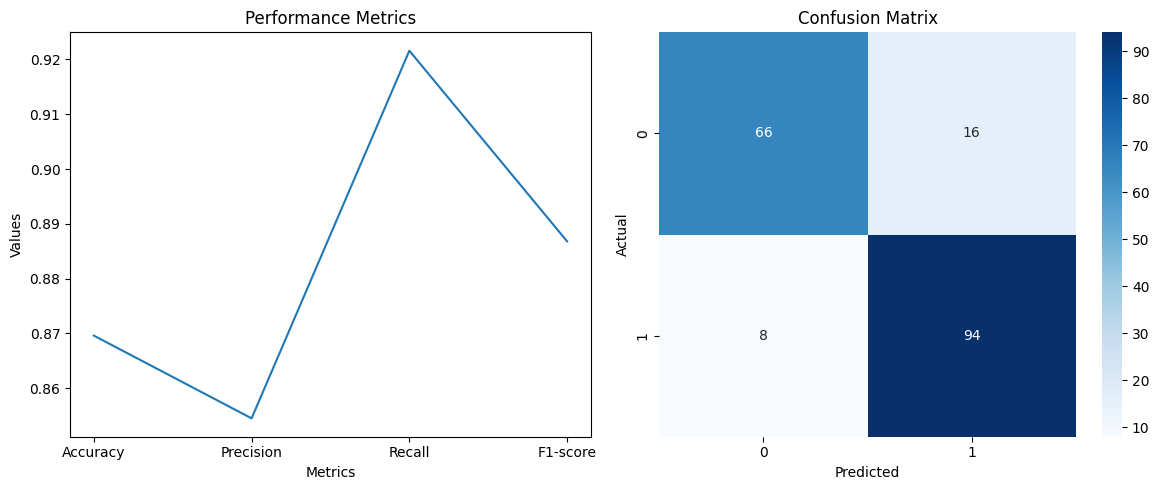

In [ ]:
classifier = SVC(C=10, kernel='linear')
accuracy_svm, precision_svm, recall_svm, f1_svm = evaluate_classifier(classifier)
model_results['SVM'] = {'Accuracy': accuracy_svm, 'Precision': precision_svm, 'Recall': recall_svm, 'F1-score': f1_svm}

## 5.2. kNN (K-Nearest Neighbors)

In [ ]:
parameters = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn, param_grid=parameters,scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)
print("Best score: ", grid_search.best_score_)
print("Best parameters: ", grid_search.best_params_)

Best score:  0.7533035131860965
Best parameters:  {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}


Kết quả các độ đo:
Accuracy: 0.7826, Precision: 0.7981, Recall: 0.8137, F1-score: 0.8058


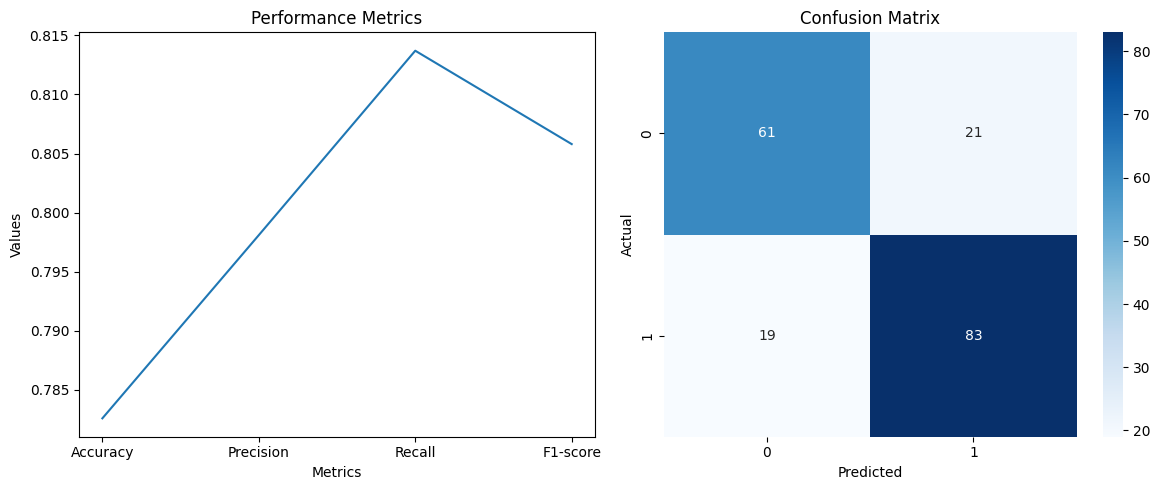

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=9, metric='manhattan', weights='distance')
accuracy_knn, precision_knn, recall_knn, f1_knn = evaluate_classifier(classifier)
model_results['K-Nearest Neighbors'] = {'Accuracy': accuracy_knn, 'Precision': precision_knn, 'Recall': recall_knn, 'F1-score': f1_knn}

## 5.3. Naïve Bayes (GaussianNB)

In [ ]:
params = {
    'priors': [None, [0.25, 0.75], [0.3, 0.7]],
    'var_smoothing': [1e-09, 1e-08, 1e-07]
}
# Khởi tạo mô hình Gaussian Naive Bayes
nb_model = GaussianNB()
grid_search = GridSearchCV(GaussianNB(), params, cv=5)
grid_search.fit(X_train, y_train)

print("Best score: ", grid_search.best_score_)
print("Best parameters: ", grid_search.best_params_)

Best score:  0.8514490727797968
Best parameters:  {'priors': [0.3, 0.7], 'var_smoothing': 1e-09}


Kết quả các độ đo:
Accuracy: 0.8859, Precision: 0.8649, Recall: 0.9412, F1-score: 0.9014


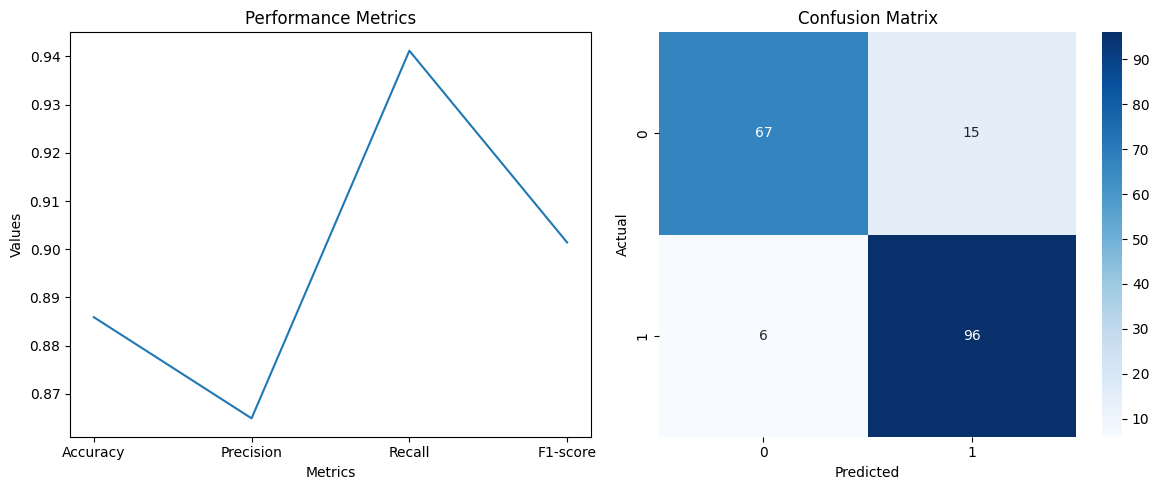

In [ ]:
classifier = GaussianNB(priors= [0.3, 0.7], var_smoothing=1e-09)
accuracy_nb, precision_nb, recall_nb, f1_nb = evaluate_classifier(classifier)
model_results['Naive Bayes'] = {'Accuracy': accuracy_nb, 'Precision': precision_nb, 'Recall': recall_nb, 'F1-score': f1_nb}

## 5.4. Random Forest

In [ ]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}
rf = RandomForestClassifier()

clf = GridSearchCV(estimator= rf, param_grid=param_grid)
clf.fit(X_train, y_train)
clf_predict = clf.predict(X_test)

rf_best_param = clf.best_params_
rf_bestscore = clf.best_score_
print(rf_best_param)
print(rf_bestscore)

{'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': 9, 'n_estimators': 25}
0.8719131488211722


Kết quả các độ đo:
Accuracy: 0.8478, Precision: 0.8364, Recall: 0.902, F1-score: 0.8679


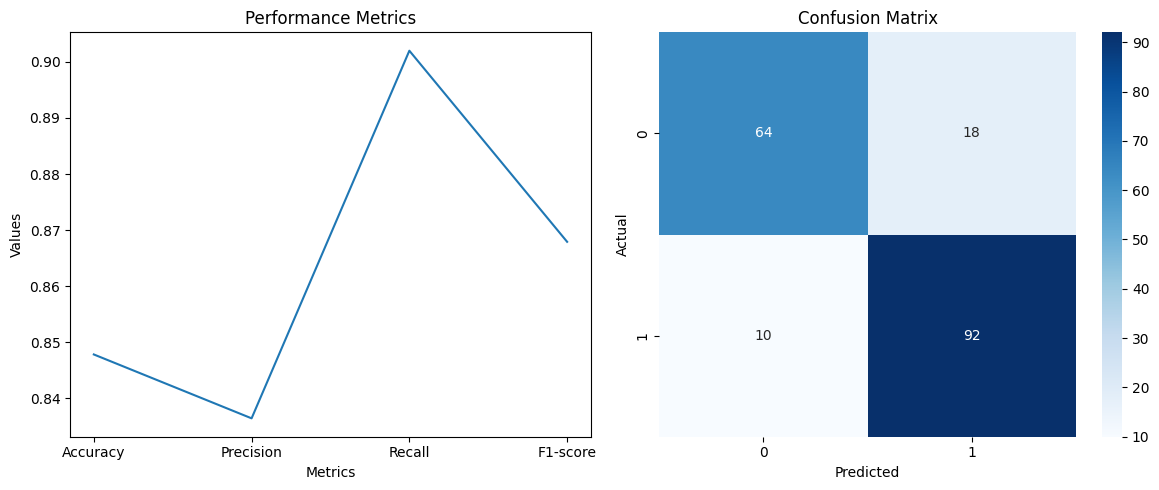

In [ ]:
classifier = RandomForestClassifier(max_depth= 3, max_features='log2', max_leaf_nodes=6, n_estimators=100)
accuracy_rf, precision_rf, recall_rf, f1_rf = evaluate_classifier(classifier)
model_results['Random Forest'] = {'Accuracy': accuracy_rf, 'Precision': precision_rf, 'Recall': recall_rf, 'F1-score': f1_rf}

## 5.5. Decision Trees 

In [ ]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [42]}

clf = GridSearchCV(DecisionTreeClassifier(), params, cv=5)
clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.best_score_)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'random_state': 42}
0.8242195508340322


Kết quả các độ đo:
Accuracy: 0.8098, Precision: 0.8252, Recall: 0.8333, F1-score: 0.8293


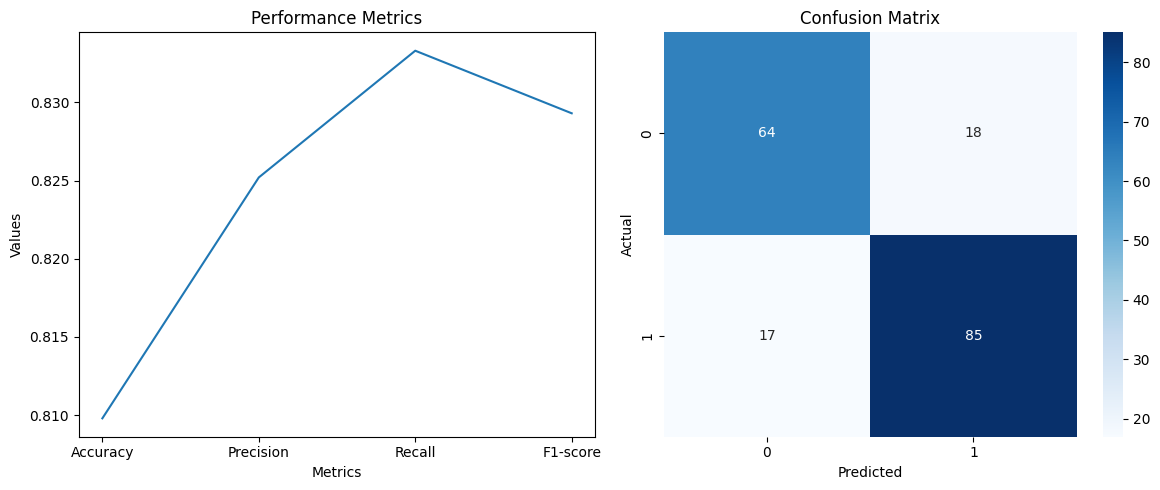

In [ ]:
classifier = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=4, min_samples_split=10, random_state=42)
accuracy_dt, precision_dt, recall_dt, f1_dt = evaluate_classifier(classifier)
model_results['Decision Trees'] = {'Accuracy': accuracy_dt, 'Precision': precision_dt, 'Recall': recall_dt, 'F1-score': f1_dt}

## 5.6. Neural Networks

In [ ]:
optimizer = ['Adam', 'SGD', 'RMSprop']
batch_size = [32,64,128]
epochs = [15, 30, 60]
param_grid = {"optimizer":optimizer, "batch_size":batch_size, "epochs":epochs}

num_classes = y.nunique()
input_dim = X.shape[1]
normalizer = Normalizer()
X_nw = normalizer.fit_transform(X)
y_nw = keras.utils.to_categorical(y, num_classes=num_classes)
X_train, X_test, y_train, y_test = train_test_split(X_nw, y_nw, stratify=y_nw, test_size=0.2, random_state=42)

def create_dnn_model():
  model = Sequential()
  model.add(Dense(250, input_dim=input_dim, activation='relu'))
  model.add(Dense(100, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
  return model

model = KerasClassifier(build_fn=create_dnn_model)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', n_jobs=-1, refit=True)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_
print(best_model)

Epoch 1/60


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


23/23 [==============================] - 0s 2ms/step - loss: 0.6723 - accuracy: 0.5463
Epoch 2/60
23/23 [==============================] - 0s 2ms/step - loss: 0.6373 - accuracy: 0.6335
Epoch 3/60
23/23 [==============================] - 0s 2ms/step - loss: 0.6182 - accuracy: 0.6444
Epoch 4/60
23/23 [==============================] - 0s 2ms/step - loss: 0.6098 - accuracy: 0.6812
Epoch 5/60
23/23 [==============================] - 0s 2ms/step - loss: 0.5974 - accuracy: 0.7016
Epoch 6/60
23/23 [==============================] - 0s 2ms/step - loss: 0.5883 - accuracy: 0.6921
Epoch 7/60
23/23 [==============================] - 0s 2ms/step - loss: 0.5785 - accuracy: 0.7030
Epoch 8/60
23/23 [==============================] - 0s 2ms/step - loss: 0.5731 - accuracy: 0.7112
Epoch 9/60
23/23 [==============================] - 0s 2ms/step - loss: 0.5668 - accuracy: 0.7125
Epoch 10/60
23/23 [==============================] - 0s 2ms/step - loss: 0.5603 - accuracy: 0.7248
Epoch 11/60
23/23 [===========

Epoch 1/60
23/23 [==============================] - 1s 2ms/step - loss: 0.6590 - accuracy: 0.5790
Epoch 2/60
23/23 [==============================] - 0s 2ms/step - loss: 0.6336 - accuracy: 0.6199
Epoch 3/60
23/23 [==============================] - 0s 2ms/step - loss: 0.6185 - accuracy: 0.6703
Epoch 4/60
23/23 [==============================] - 0s 2ms/step - loss: 0.6057 - accuracy: 0.6676
Epoch 5/60
23/23 [==============================] - 0s 2ms/step - loss: 0.5971 - accuracy: 0.6935
Epoch 6/60
23/23 [==============================] - 0s 3ms/step - loss: 0.5808 - accuracy: 0.6989
Epoch 7/60
23/23 [==============================] - 0s 3ms/step - loss: 0.5778 - accuracy: 0.7139
Epoch 8/60
23/23 [==============================] - 0s 3ms/step - loss: 0.5711 - accuracy: 0.7084
Epoch 9/60
23/23 [==============================] - 0s 2ms/step - loss: 0.5680 - accuracy: 0.7071
Epoch 10/60
23/23 [==============================] - 0s 2ms/step - loss: 0.5594 - accuracy: 0.7180
Epoch 11/60
23/23 [

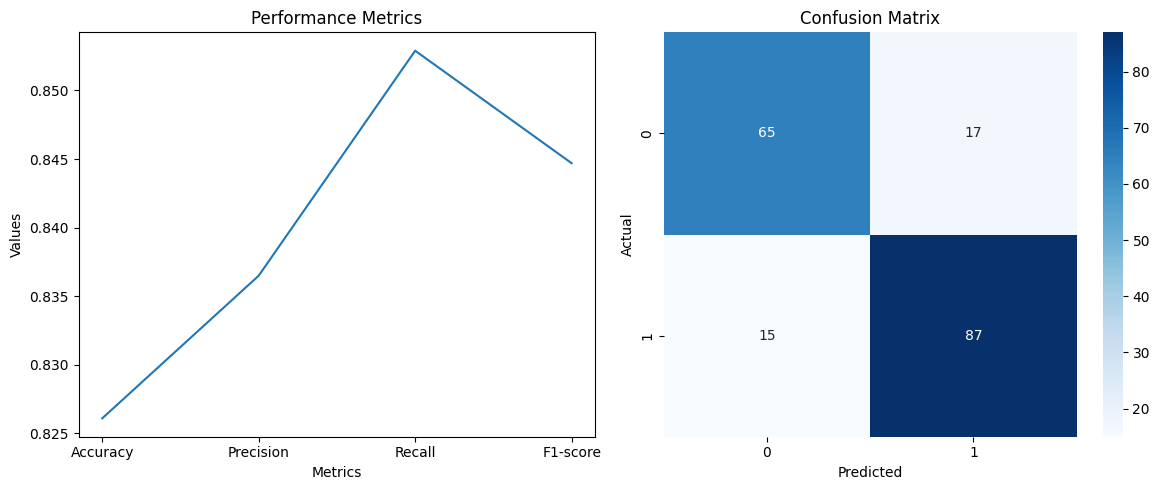

In [ ]:
model = Sequential()
model.add(Dense(250, input_dim=input_dim, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='RMSprop')

normalizer = Normalizer()
X_nw = normalizer.fit_transform(X)
y_nw = keras.utils.to_categorical(y, num_classes=num_classes)
X_train, X_test, y_train, y_test = train_test_split(X_nw, y_nw, stratify=y_nw, test_size=0.2, random_state=42)
model.fit(X_train, y_train, epochs=60, batch_size=32, verbose=1)

score = model.evaluate(X_test,y_test)
print(score)

y_pred = model.predict(X_test)

accuracy = round(accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)), 4)
precision = np.round(precision_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)), 4)
recall = np.round(recall_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)), 4)
f1 = np.round(f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)), 4)

accuracy_nn, precision_nn, recall_nn, f1_nn = accuracy, precision, recall, f1
model_results['Neural Networks'] = {'Accuracy': accuracy_nn, 'Precision': precision_nn, 'Recall': recall_nn, 'F1-score': f1_nn}

    
# In ra kết quả
print("Kết quả các độ đo:")
print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-score: {f1}")

# Tính toán ma trận nhầm lẫn
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
    
# Tạo lưới đồ thị
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
# Vẽ biểu đồ đường
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]
ax1.plot(metrics, values)
ax1.set_xlabel('Metrics')
ax1.set_ylabel('Values')
ax1.set_title('Performance Metrics')

    
# Vẽ ma trận nhầm lẫn
sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', ax=ax2)
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')
ax2.set_title('Confusion Matrix')
    
# Điều chỉnh khoảng trống giữa hai đồ thị
fig.tight_layout()
    
# Hiển thị biểu đồ
plt.show()


# 6. Kết luận
## 6.1 Đánh giá giữa các mô hình
So sánh các hệ số đánh giá giữa các mô hình máy học đã được xây dựng để giải quyết bài toán ban đầu. Gồm có 4 biểu đồ cho 4 hệ số: Accuracy (Độ chính xác tổng quát), Precision (Độ chính xác), Recall (Độ nhạy), F1.

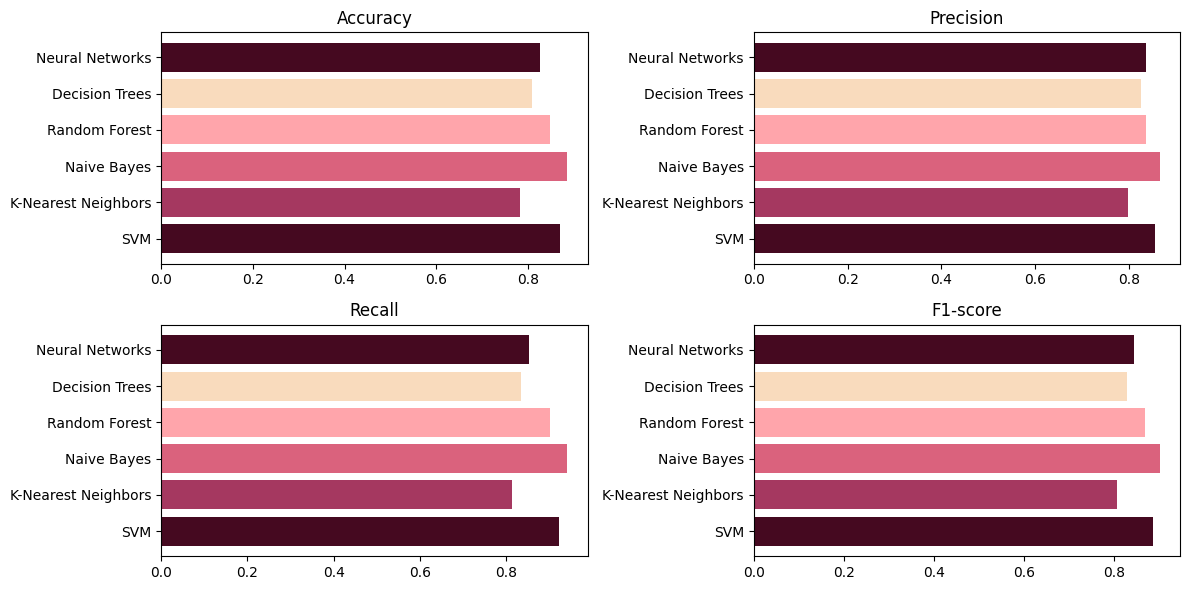

In [ ]:
# models = ['SVM', 'K-Nearest Neighbors', 'Naive Bayes', 'Random Forest', 'Decision Trees', 'Neural Networks']
# Vẽ biểu đồ
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']

num_rows = len(metrics) // 2 + len(metrics) % 2
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))

for i, metric in enumerate(metrics):
    row = i // num_cols
    col = i % num_cols
    
    # Lấy giá trị của từng mô hình cho metric
    values = [model_results[model][metric] for model in model_results]
    
    # Vẽ biểu đồ
    axes[row, col].barh(list(model_results.keys()), values, color=custom_palette)
    axes[row, col].set_title(metric)

# Xóa các trục trống
for i in range(len(metrics), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

Dựa trên kết quả của 6 mô hình training trên, có thể rút ra 1 số kết luận sau:



1.   **Naive Bayes** có kết quả tốt nhất trong số các mô hình được đánh giá. Với accuracy là 0.8859, precision là 0.8649, recall là 0.9412 và F1-score là 0.9014, Naive Bayes đạt được một sự cân bằng tốt giữa việc dự đoán chính xác cả lớp positive và negative.
2.   **SVM** cũng có kết quả rất tốt với accuracy là 0.8696, precision là 0.8545, recall là 0.9216 và F1-score là 0.8868. Mặc dù SVM không có kết quả cao bằng Naive Bayes, nhưng nó vẫn đạt được một mức độ cân bằng đáng kể trong việc dự đoán cả hai lớp.
3.   **Random Forest** có kết quả khá tốt với accuracy là 0.8478, precision là 0.8364, recall là 0.902 và F1-score là 0.8679. Random Forest cũng cho thấy khả năng phân loại tốt và khá ổn định.
4.   **Neural Networks** đạt kết quả tương đối tốt với accuracy là 0.8261, precision là 0.8365, recall là 0.8529 và F1-score là 0.8447. Neural Networks thường có khả năng học tập mạnh mẽ và phù hợp cho các bài toán phức tạp với dữ liệu có cấu trúc phức tạp.
5.   **Decision Trees** đạt kết quả khá với accuracy là 0.8098, precision là 0.8252, recall là 0.8333 và F1-score là 0.8293. Decision Trees có khả năng diễn giải tốt và dễ hiểu, tuy nhiên, có thể gặp khó khăn khi xử lý dữ liệu có nhiều biến.
6.   **K-Nearest Neighbors** có kết quả thấp hơn so với các mô hình khác với accuracy là 0.7826, precision là 0.7981, recall là 0.8137 và F1-score là 0.8058. K-Nearest Neighbors thường hoạt động tốt với dữ liệu có cấu trúc đơn giản và không gian đặc trưng rõ ràng.

Tóm lại, Naive Bayes và SVM đều là các mô hình có kết quả tốt. Naive Bayes có kết quả cao hơn, nhưng SVM có thể là một lựa chọn hợp lý với hiệu suất tốt và khả năng cân bằng trong việc phân loại. 